## *Parameter Extraction ECG*
### **Project Psychophysiology - winter semester 2024/25**

### Team NeuroU-bahnismus

#### Seunghui Ko, Jonas Ebert, Luca Strasser




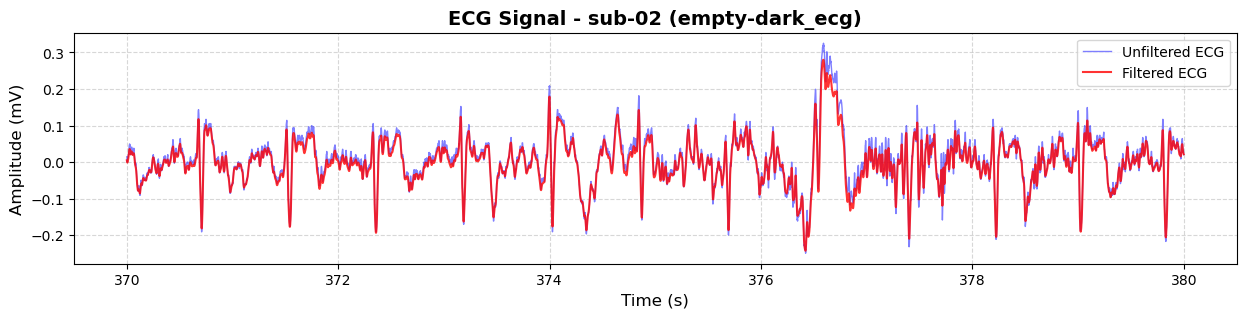

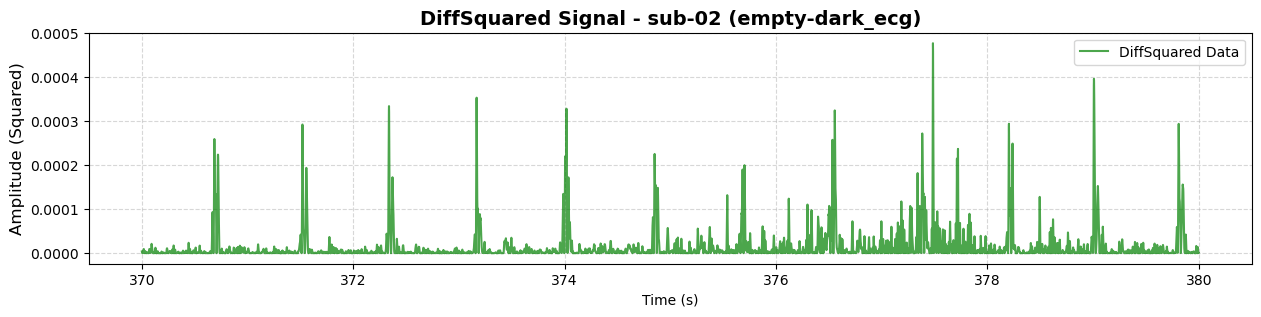

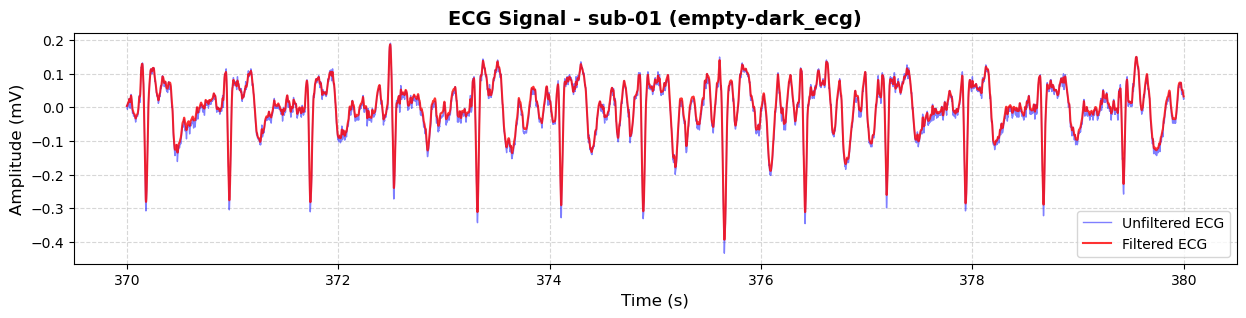

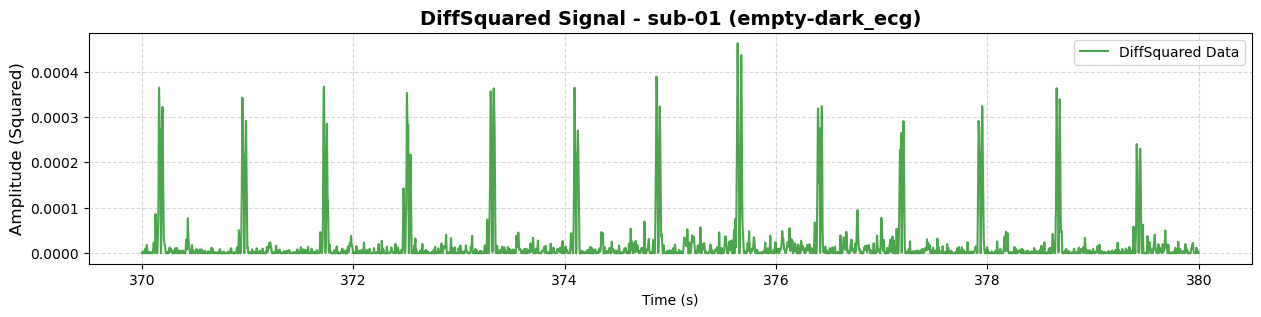

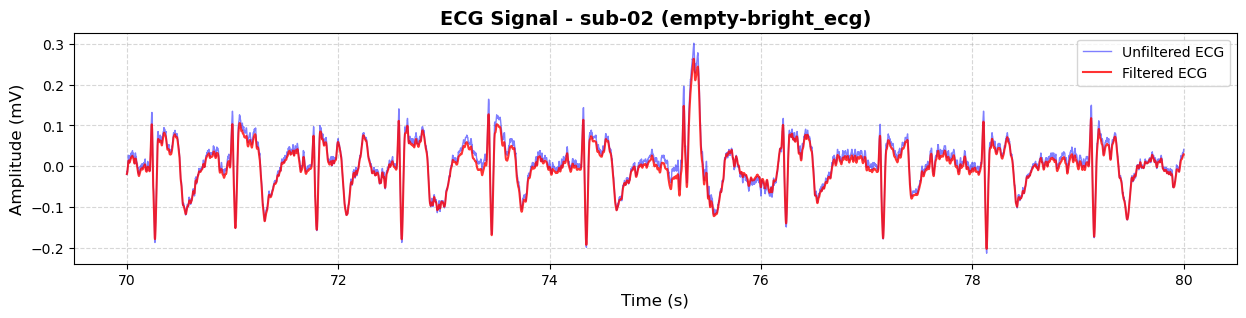

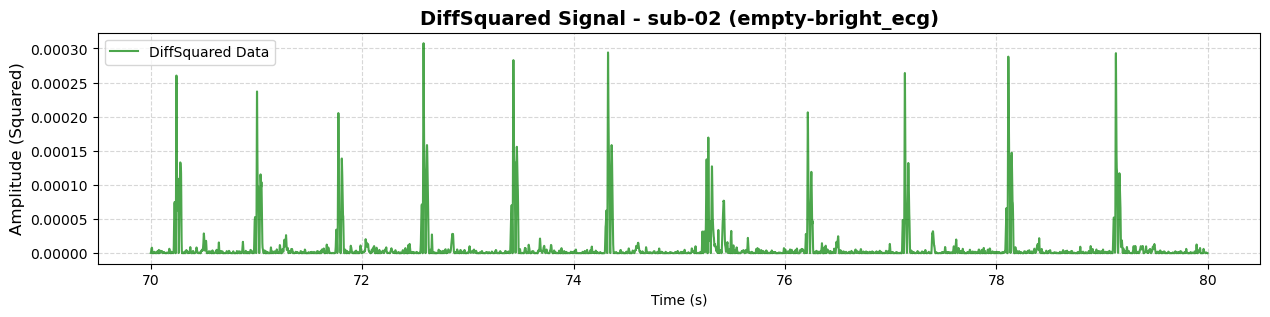

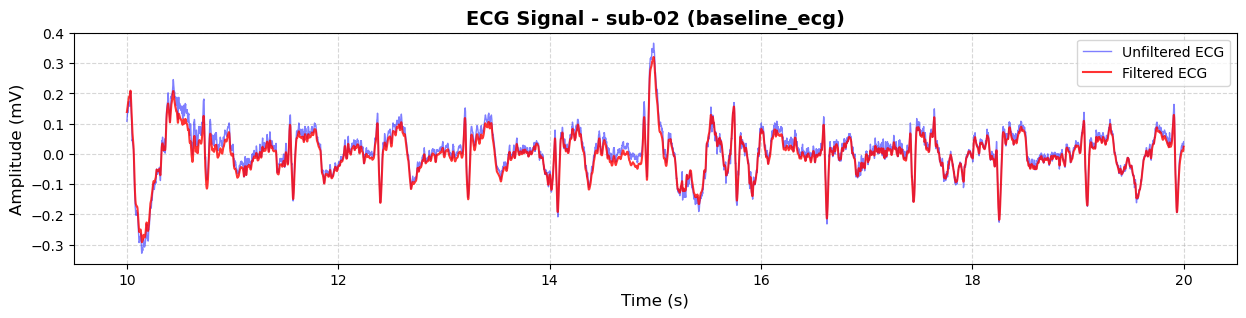

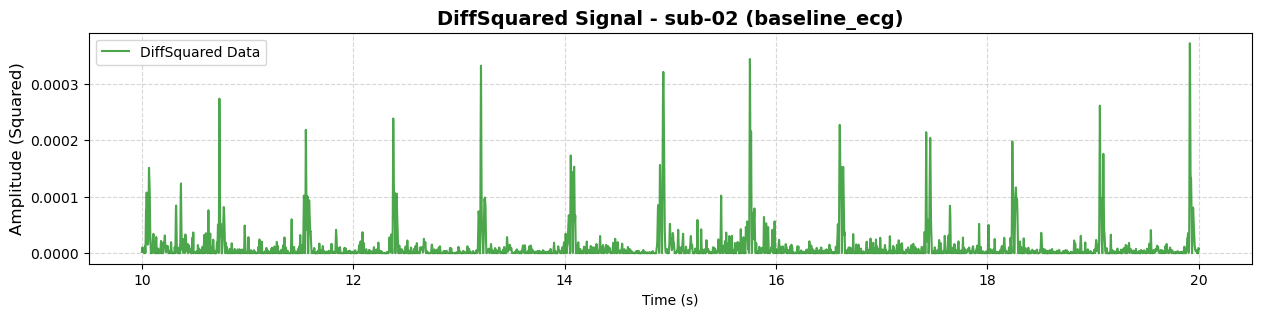

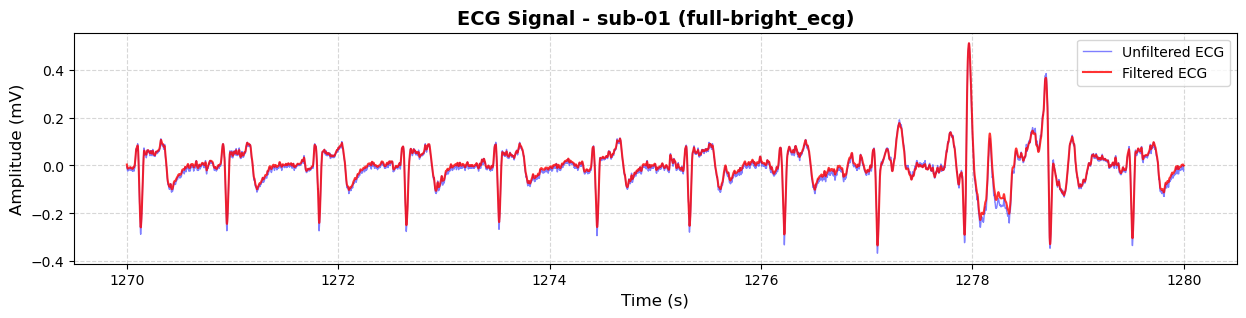

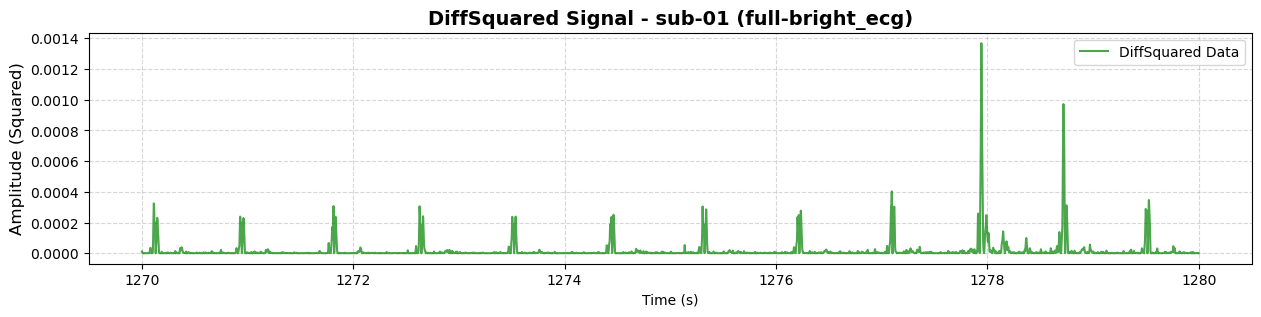

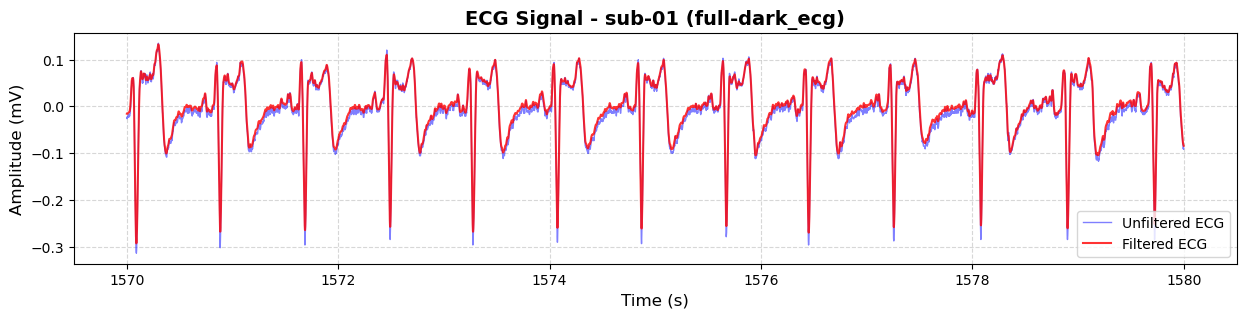

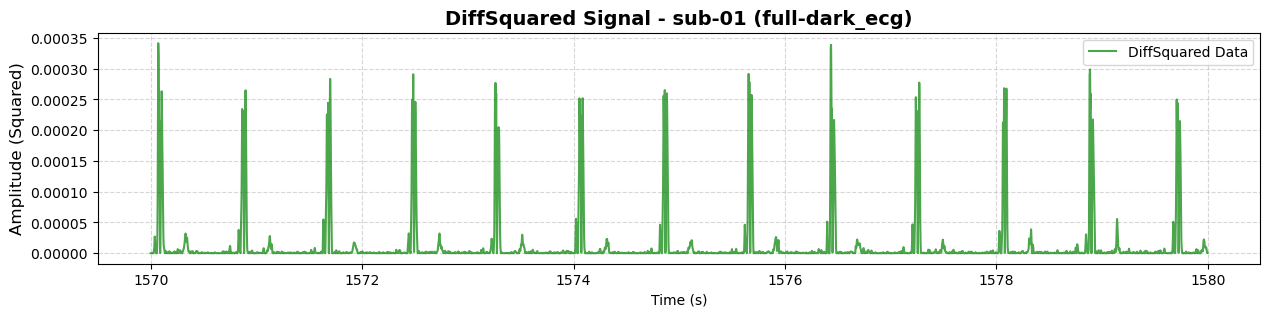

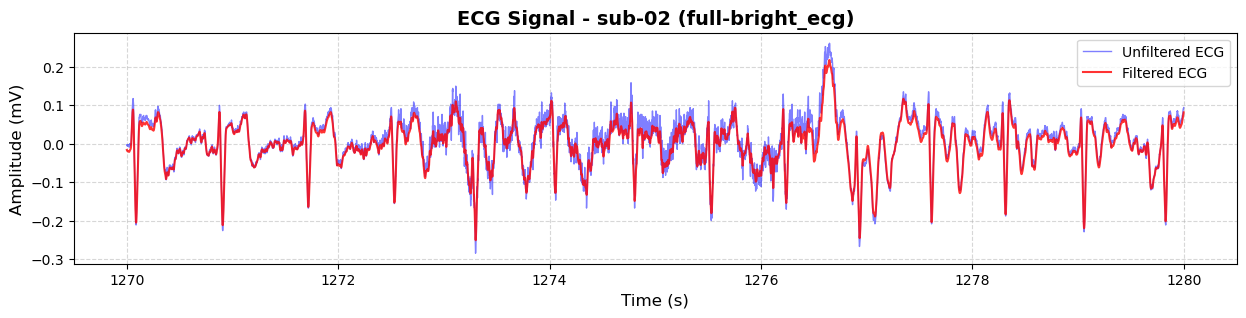

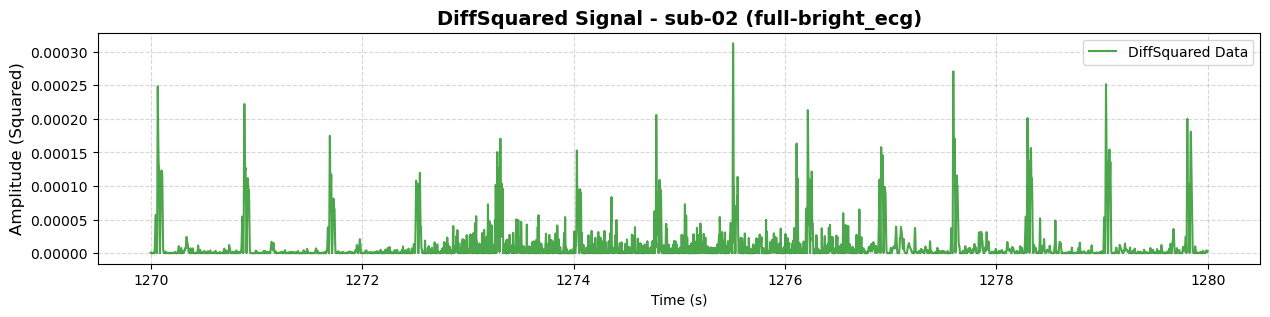

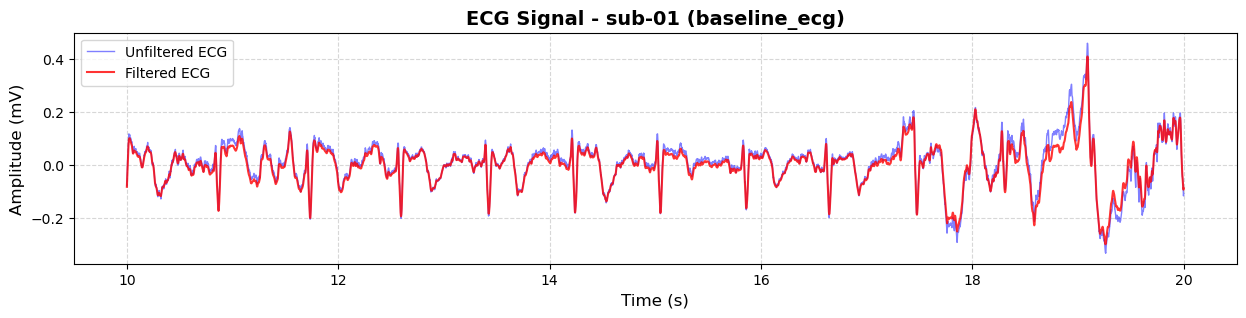

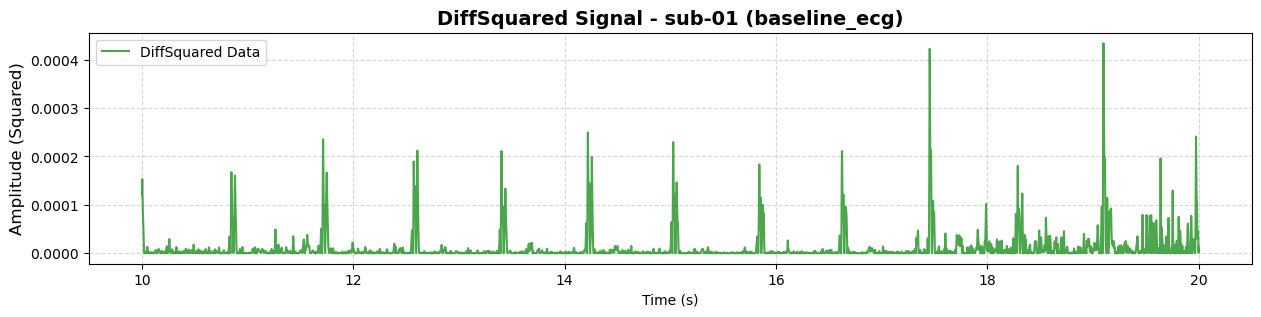

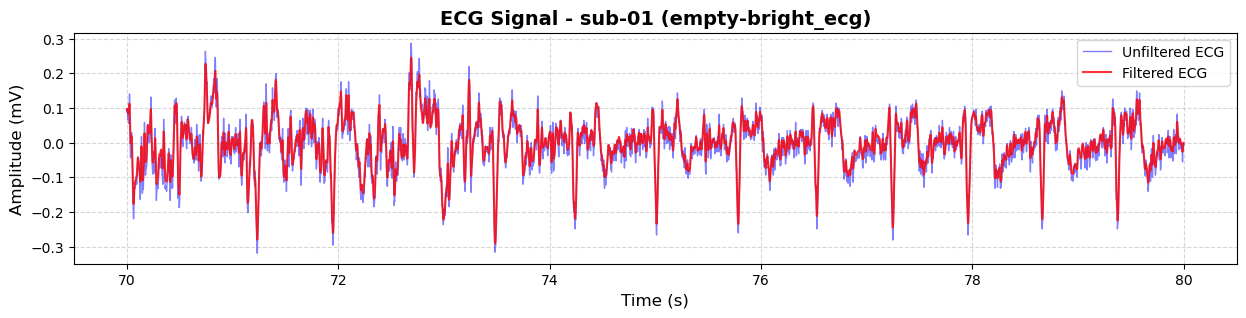

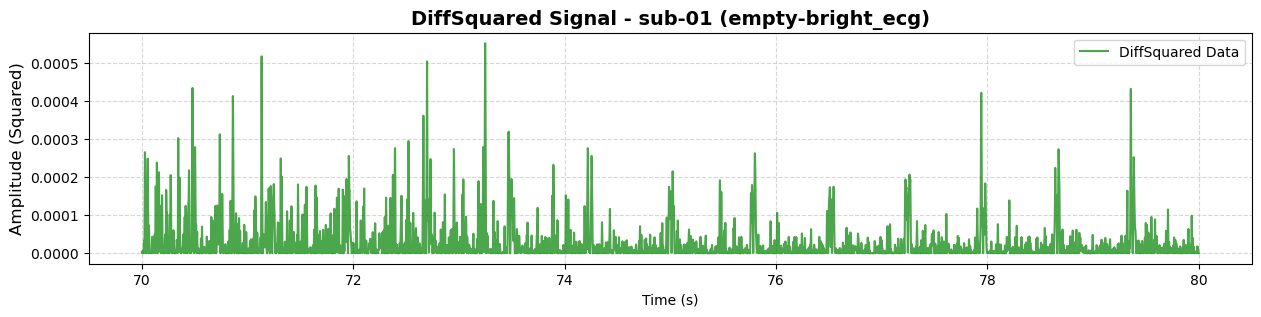

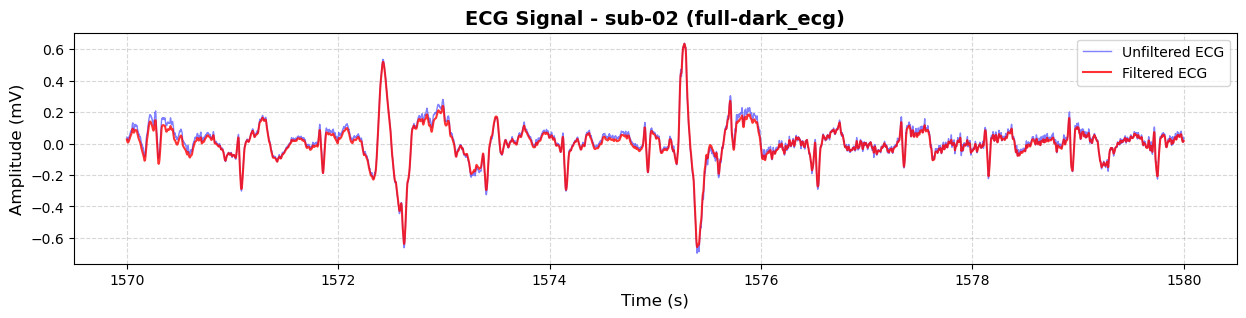

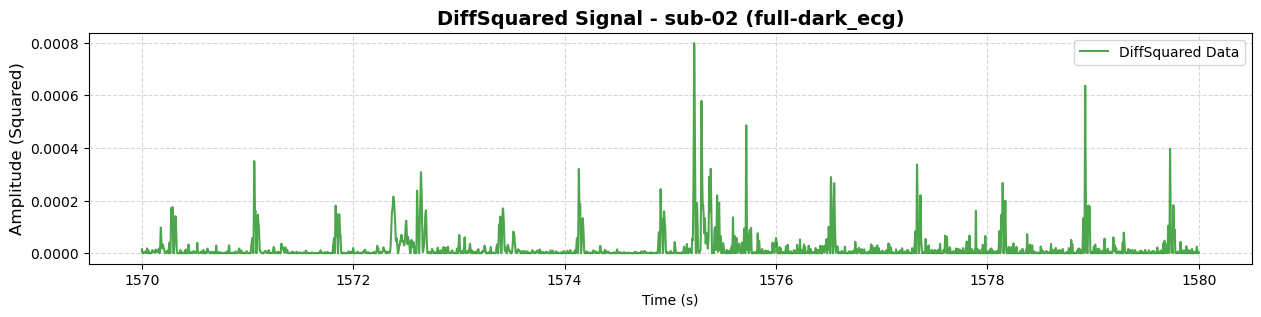

Daten erfolgreich gespeichert unter: /Users/luca/Downloads/GitHub/Team_U-bahn/preprocessed-data/preprocessed_ecg.pkl
Lade vorverarbeitete EKG-Daten...

Struktur des ersten Datenobjekts:
dict_keys(['participant', 'condition', 'filtered_data', 'derive_sq_data', 'time'])

Teilnehmer: sub-02, Bedingung: empty-dark_ecg
Anzahl erkannter Peaks: 285
Aufnahmedauer: 4.00 Minuten
Durchschnittliche BPM: 71.25


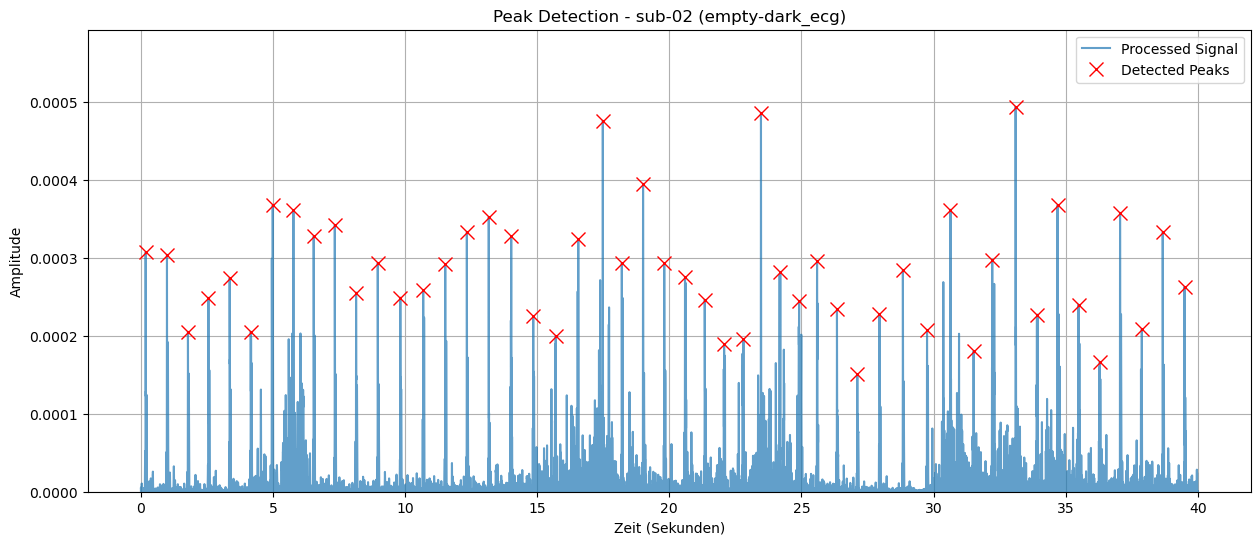


Teilnehmer: sub-01, Bedingung: empty-dark_ecg
Anzahl erkannter Peaks: 299
Aufnahmedauer: 4.00 Minuten
Durchschnittliche BPM: 74.75


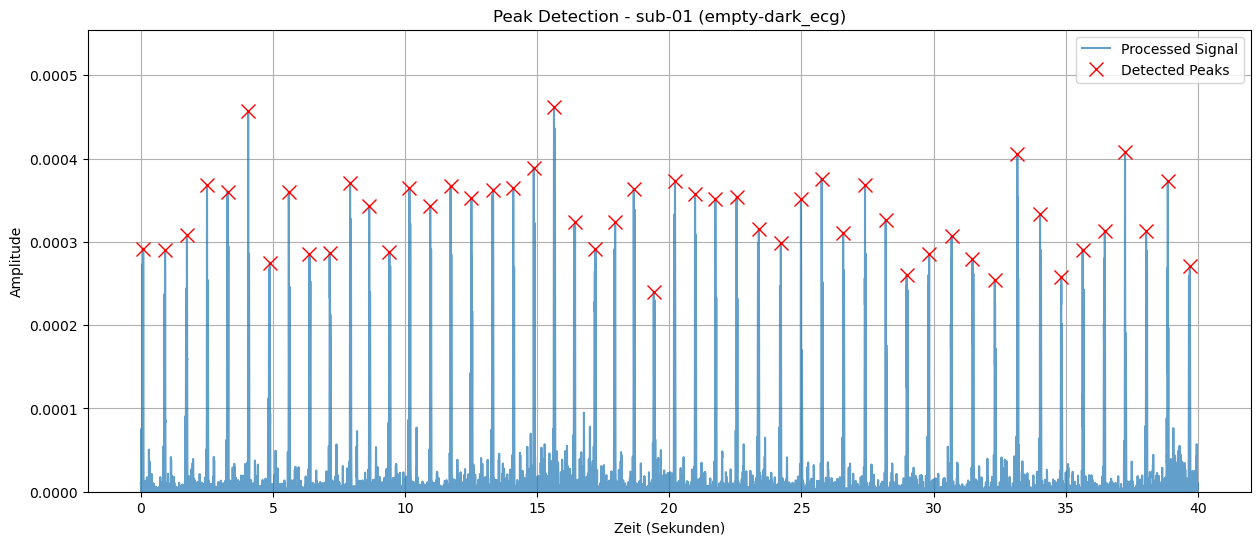


Teilnehmer: sub-02, Bedingung: empty-bright_ecg
Anzahl erkannter Peaks: 356
Aufnahmedauer: 4.98 Minuten
Durchschnittliche BPM: 71.44


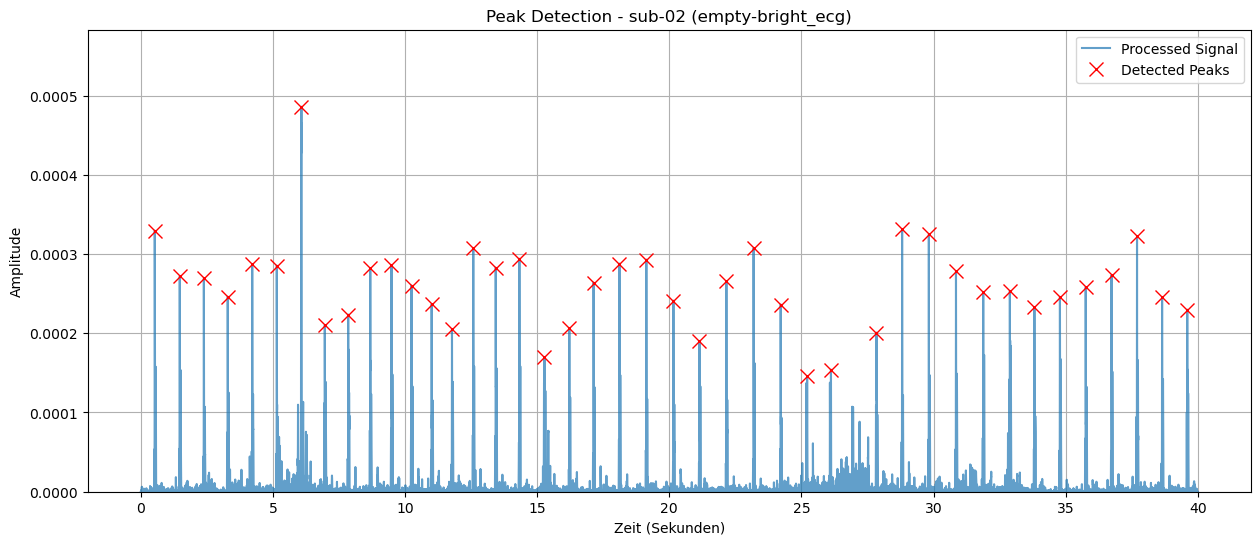


Teilnehmer: sub-02, Bedingung: baseline_ecg
Anzahl erkannter Peaks: 328
Aufnahmedauer: 4.71 Minuten
Durchschnittliche BPM: 69.68


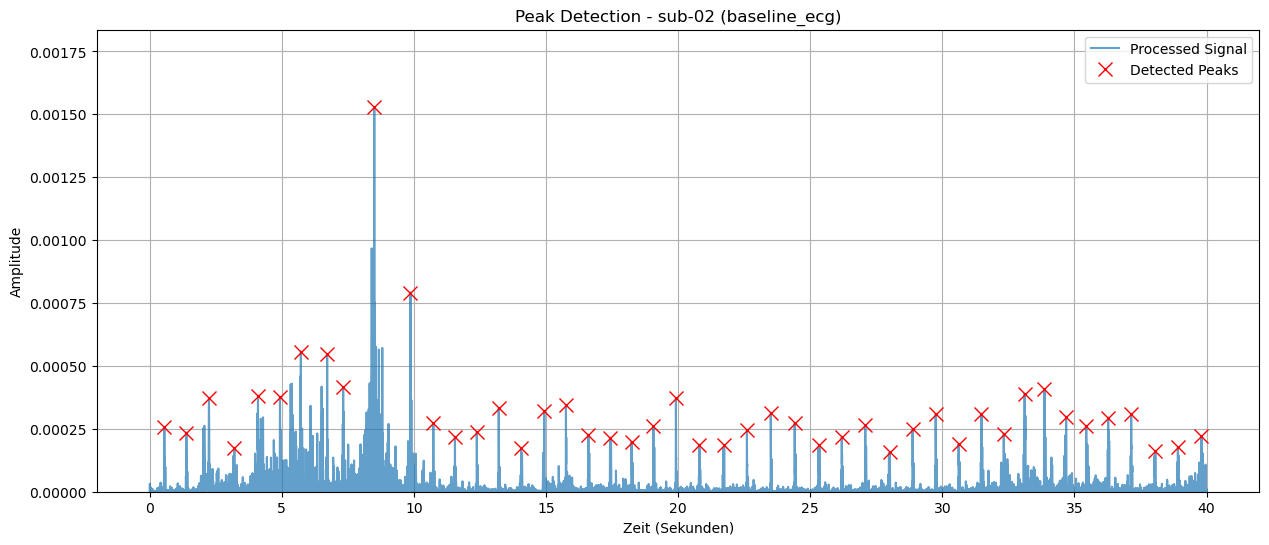


Teilnehmer: sub-01, Bedingung: full-bright_ecg
Anzahl erkannter Peaks: 368
Aufnahmedauer: 4.98 Minuten
Durchschnittliche BPM: 73.85


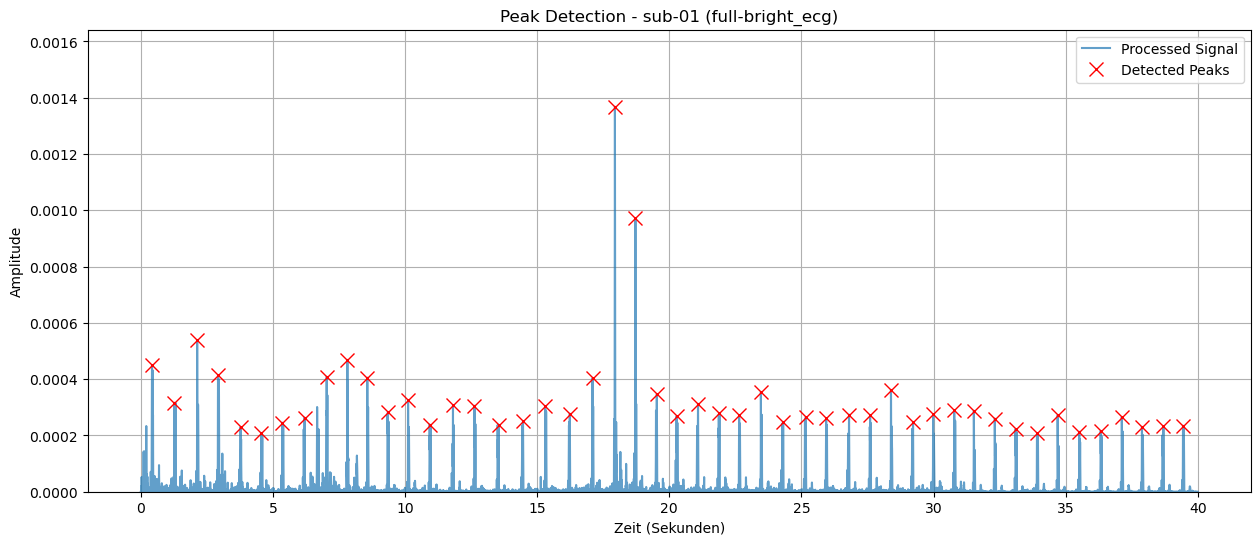


Teilnehmer: sub-01, Bedingung: full-dark_ecg
Anzahl erkannter Peaks: 300
Aufnahmedauer: 4.00 Minuten
Durchschnittliche BPM: 75.00


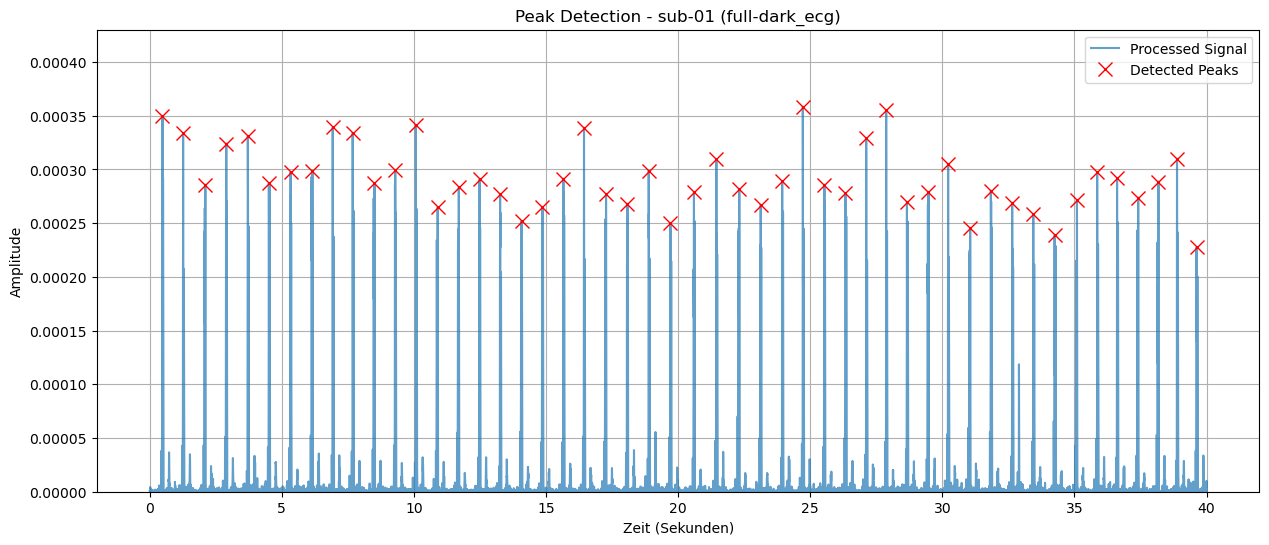


Teilnehmer: sub-02, Bedingung: full-bright_ecg
Anzahl erkannter Peaks: 358
Aufnahmedauer: 4.98 Minuten
Durchschnittliche BPM: 71.84


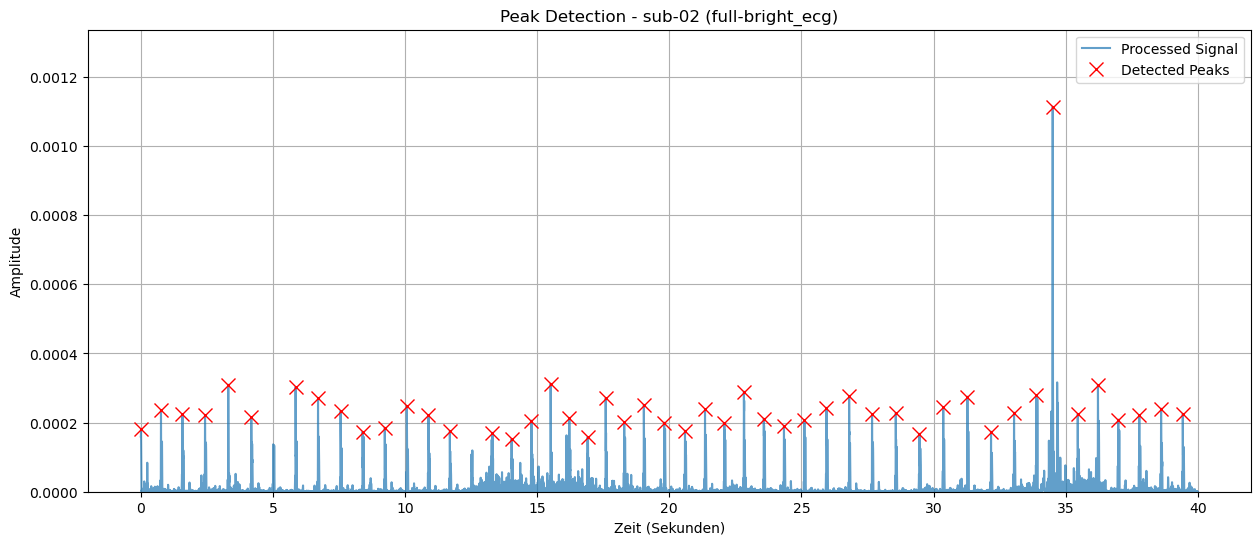


Teilnehmer: sub-01, Bedingung: baseline_ecg
Anzahl erkannter Peaks: 377
Aufnahmedauer: 5.38 Minuten
Durchschnittliche BPM: 70.01


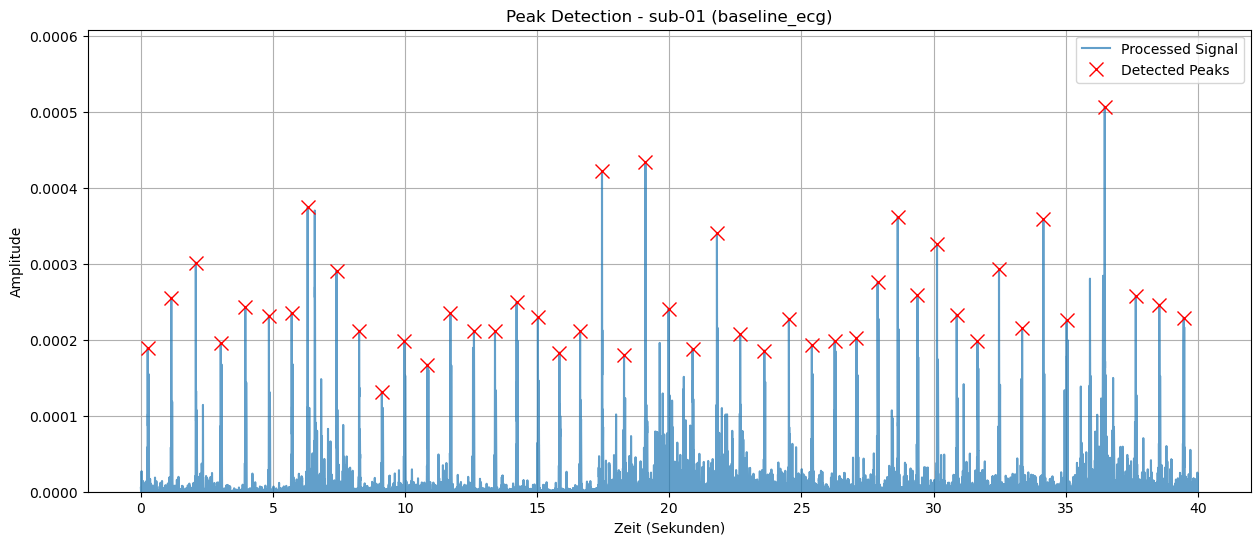


Teilnehmer: sub-01, Bedingung: empty-bright_ecg
Anzahl erkannter Peaks: 371
Aufnahmedauer: 4.98 Minuten
Durchschnittliche BPM: 74.45


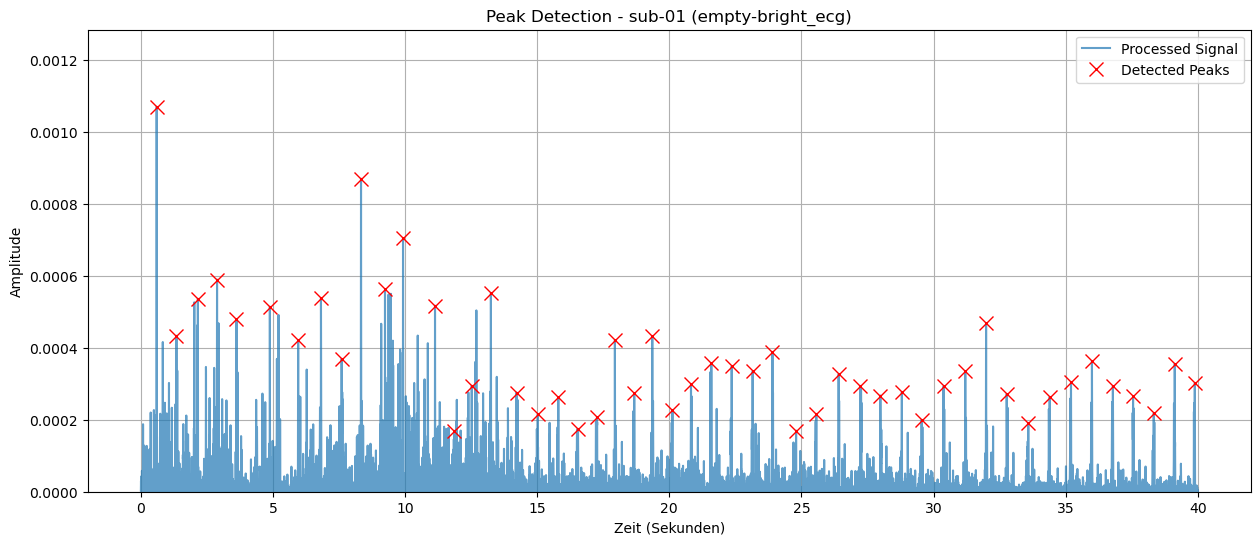


Teilnehmer: sub-02, Bedingung: full-dark_ecg
Anzahl erkannter Peaks: 275
Aufnahmedauer: 4.00 Minuten
Durchschnittliche BPM: 68.75


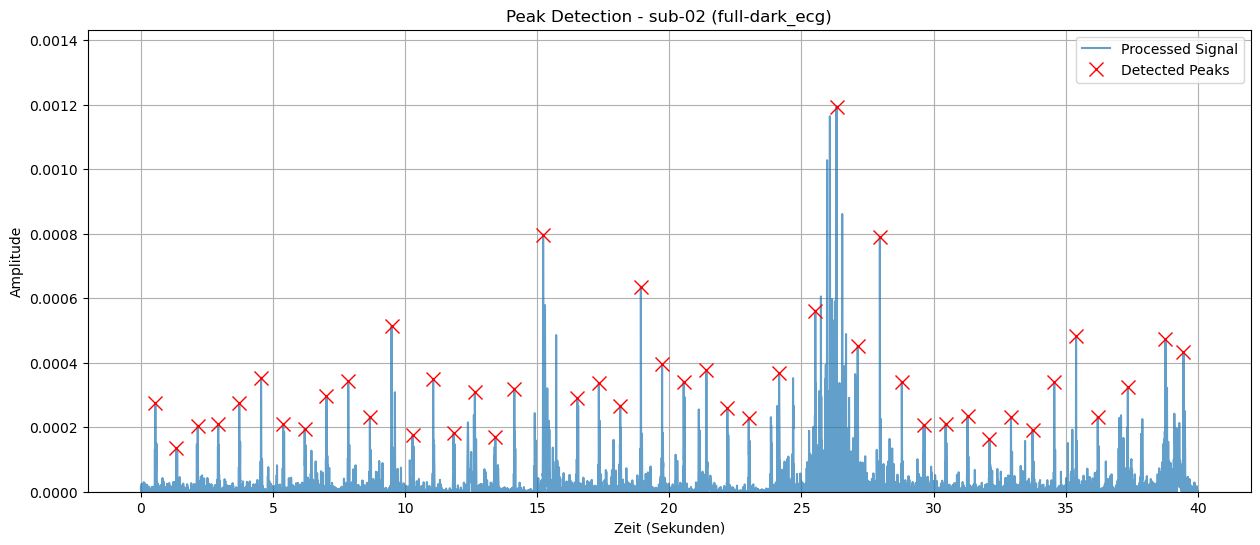


Speichere aktualisierte Daten mit BPM-Werten...
Daten erfolgreich gespeichert unter: /Users/luca/Downloads/GitHub/Team_U-bahn/preprocessed-data/preprocessed_ecg.pkl


In [5]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd

# Filterparameter
fs = 1000  # Samplingrate (Hz)
lowcut = 0.5  # Untere Grenzfrequenz (Hz)
highcut = 50.0  # Obere Grenzfrequenz (Hz)

# Butterworth-Bandpass-Filter erstellen
b, a = signal.butter(1, [lowcut / (0.5 * fs), highcut / (0.5 * fs)], btype='band')

# Zeitintervall definieren
start_idx = 10000
end_idx = 20000

# Ordner zum Speichern der Daten
derivative_folder = '/Users/luca/Downloads/GitHub/Team_U-bahn/preprocessed-data/'
output_filename = os.path.join(derivative_folder, 'preprocessed_ecg.pkl')

# Sicherstellen, dass der Ausgabeordner existiert
os.makedirs(derivative_folder, exist_ok=True)

# Liste für die verarbeiteten Daten
processed_data = []

# Dateien im Ordner durchsuchen
raw_data_folder = '/Users/luca/Downloads/GitHub/Team_U-bahn/rawdata/'
files = [f for f in os.listdir(raw_data_folder) if f.endswith('.csv') and '_ecg' in f]

for filename in files:
    file_path = os.path.join(raw_data_folder, filename)

    # Datei laden
    data = pd.read_csv(file_path)

    # Teilnehmer- und Bedingungsinformationen aus dem Dateinamen ableiten
    participant_name = filename.split('_')[0]
    condition_name = '_'.join(filename.split('_')[1:]).replace('.csv', '')

    # Extrahiere Daten
    ecg_data = data['ECG (mV)'].to_numpy()
    time_data = data['Time'].to_numpy()

    # Filter anwenden
    filtered_ecg = signal.filtfilt(b, a, ecg_data)

    # Ableitungsfilter und Quadratbildung anwenden
    derivative_ecg = np.diff(filtered_ecg)
    squared_ecg = np.square(derivative_ecg)

    # Speichere die verarbeiteten Daten in einer neuen Struktur
    processed_data.append({
        "participant": participant_name,
        "condition": condition_name,
        "filtered_data": filtered_ecg,
        "derive_sq_data": squared_ecg,
        "time": time_data
    })

    # Visualisierung: Original und Gefiltertes Signal in einem Plot
    plt.figure(figsize=(15, 3))  # Flacherer Plot durch kleinere Höhe
    plt.plot(
        time_data[start_idx:end_idx],
        ecg_data[start_idx:end_idx],
        label="Unfiltered ECG",
        color="blue",
        alpha=0.5,
        linewidth=1,
    )
    plt.plot(
        time_data[start_idx:end_idx],
        filtered_ecg[start_idx:end_idx],
        label="Filtered ECG",
        color="red",
        alpha=0.8,
        linewidth=1.5,
    )
    plt.title(f"ECG Signal - {participant_name} ({condition_name})", fontsize=14, fontweight='bold')
    plt.xlabel("Time (s)", fontsize=12)
    plt.ylabel("Amplitude (mV)", fontsize=12)
    plt.legend()
    plt.grid(alpha=0.5, linestyle="--")
    plt.show()

    # Visualisierung der DiffSquared Data (Zeitintervall)
    plt.figure(figsize=(15, 3))
    plt.plot(
        time_data[start_idx:end_idx - 1],
        squared_ecg[start_idx:end_idx - 1],
        label="DiffSquared Data",
        color="green",
        alpha=0.7,
    )
    plt.title(f"DiffSquared Signal - {participant_name} ({condition_name})", fontsize=14, fontweight='bold')
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (Squared)", fontsize=12)
    plt.legend()
    plt.grid(alpha=0.5, linestyle="--")
    plt.show()

# Speichern der verarbeiteten Daten in einer Pickle-Datei
with open(output_filename, 'wb') as f:
    pickle.dump(processed_data, f)

print(f'Daten erfolgreich gespeichert unter: {output_filename}')

# --- Verarbeitung der geladenen Daten ---
print("Lade vorverarbeitete EKG-Daten...")
with open(output_filename, 'rb') as f:
    loaded_data = pickle.load(f)

print("\nStruktur des ersten Datenobjekts:")
print(loaded_data[0].keys())

# Verarbeitung der geladenen Daten
for participant_data in loaded_data:
    condition_name = participant_data["condition"]
    participant_name = participant_data["participant"]
    derive_sq_data = participant_data["derive_sq_data"].flatten()

    # Adaptive Schwellenwertberechnung
    signal_mean = np.mean(derive_sq_data)
    signal_std = np.std(derive_sq_data)
    indiv_threshold = signal_mean + 3 * signal_std

    # Mindestabstand zwischen Peaks
    sampling_frequency = 1000  # Hz
    min_ecg_interval = 0.6    # Sekunden (entspricht 100 BPM)
    indiv_distance = int(min_ecg_interval * sampling_frequency)

    # Peaks finden
    peaks, _ = signal.find_peaks(derive_sq_data, 
                                 height=indiv_threshold,
                                 distance=indiv_distance)

    # BPM berechnen
    peak_times = peaks / sampling_frequency
    num_minutes = (derive_sq_data.shape[0] / sampling_frequency) / 60
    bpm = len(peaks) / num_minutes

    print(f"\nTeilnehmer: {participant_name}, Bedingung: {condition_name}")
    print(f"Anzahl erkannter Peaks: {len(peaks)}")
    print(f"Aufnahmedauer: {num_minutes:.2f} Minuten")
    print(f"Durchschnittliche BPM: {bpm:.2f}")

    # Plot der ersten 40 Sekunden
    first_segment_samples = sampling_frequency * 40
    time_axis = np.arange(first_segment_samples) / sampling_frequency

    plt.figure(figsize=(15, 6))
    plt.plot(time_axis, derive_sq_data[:first_segment_samples], label="Processed Signal", alpha=0.7)
    first_segment_peaks = peaks[peaks < first_segment_samples]
    plt.plot(first_segment_peaks / sampling_frequency, derive_sq_data[first_segment_peaks], "rx", label="Detected Peaks", markersize=10)
    plt.title(f"Peak Detection - {participant_name} ({condition_name})")
    plt.xlabel("Zeit (Sekunden)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.ylim(0, np.max(derive_sq_data[:first_segment_samples]) * 1.2)
    plt.show()

    # BPM im Datensatz speichern
    participant_data["bpm"] = bpm

# Speichern der aktualisierten Daten mit BPM-Werten
print("\nSpeichere aktualisierte Daten mit BPM-Werten...")
with open(output_filename, 'wb') as f:
    pickle.dump(loaded_data, f)

print(f"Daten erfolgreich gespeichert unter: {output_filename}")



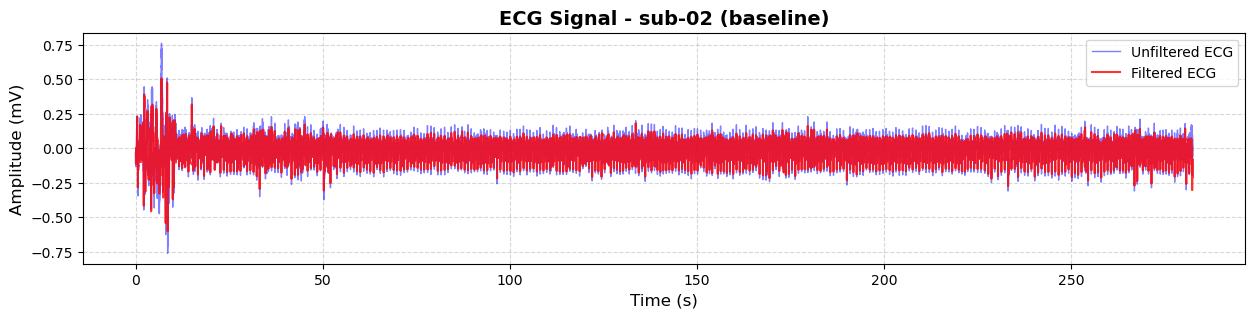

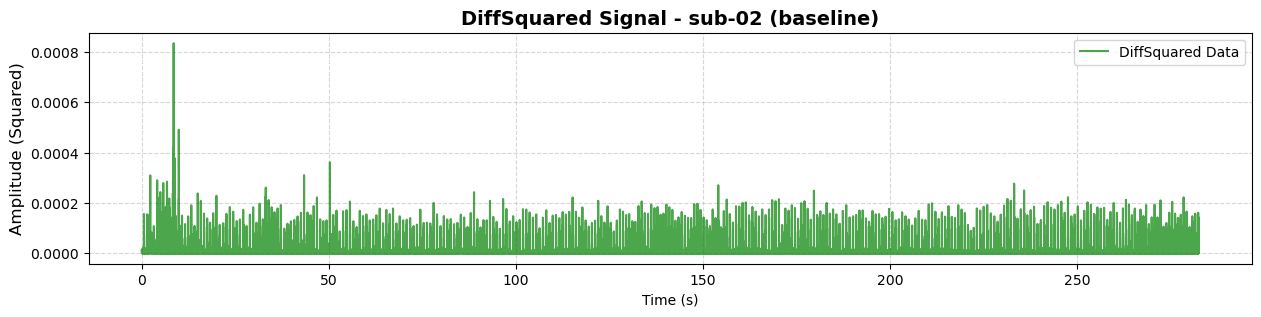

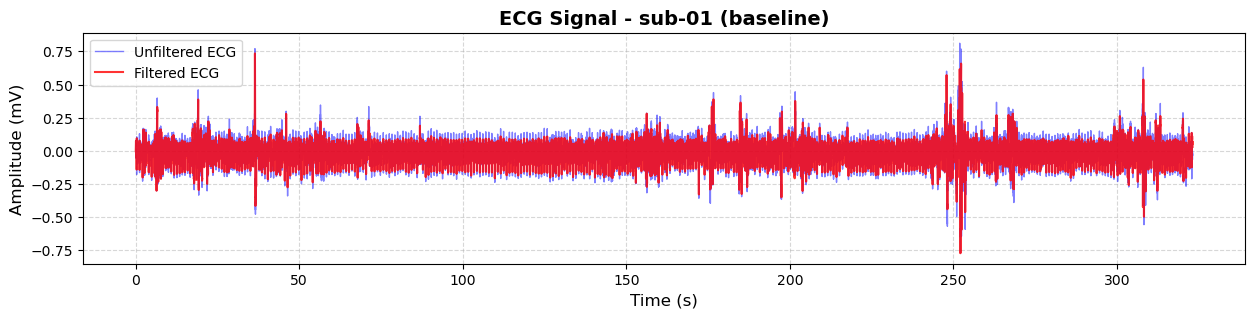

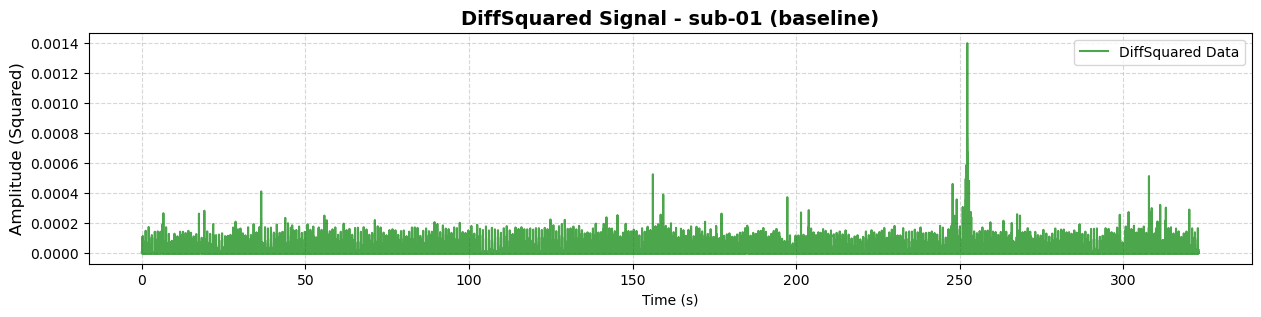

Baseline-Daten erfolgreich gespeichert unter: /Users/luca/Downloads/GitHub/Team_U-bahn/preprocessed-data/baseline_preprocessed.pkl
Lade vorverarbeitete Baseline-Daten...

Struktur des ersten Baseline-Datenobjekts:
dict_keys(['participant', 'condition', 'filtered_data', 'derive_sq_data', 'time'])

Teilnehmer: sub-02, Bedingung: baseline
Anzahl erkannter Peaks: 328
Aufnahmedauer: 4.71 Minuten
Durchschnittliche BPM: 69.68


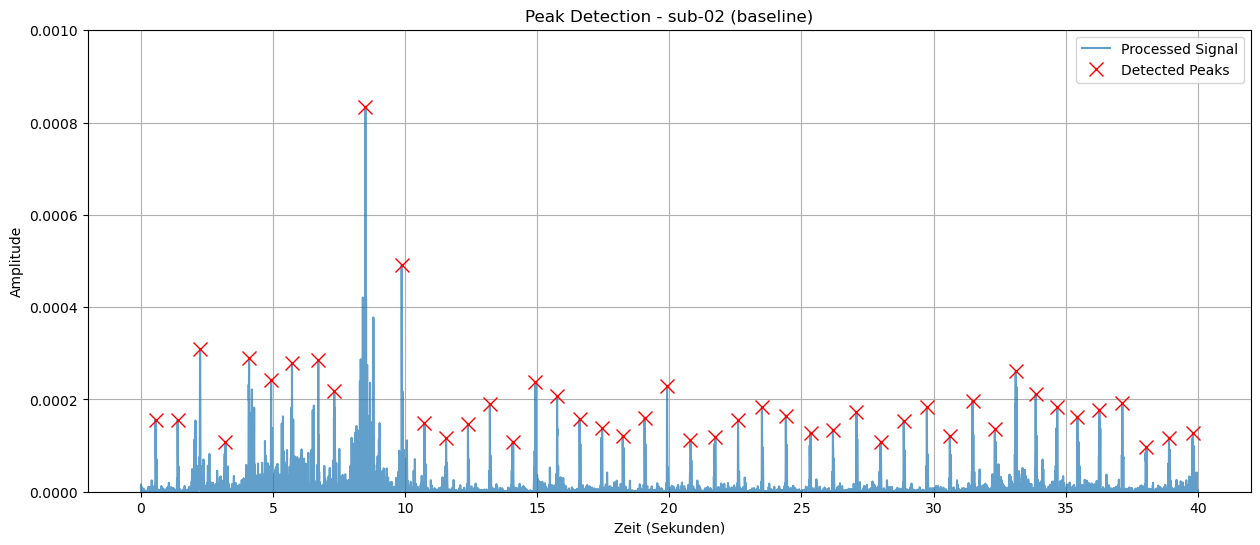


Teilnehmer: sub-01, Bedingung: baseline
Anzahl erkannter Peaks: 375
Aufnahmedauer: 5.38 Minuten
Durchschnittliche BPM: 69.64


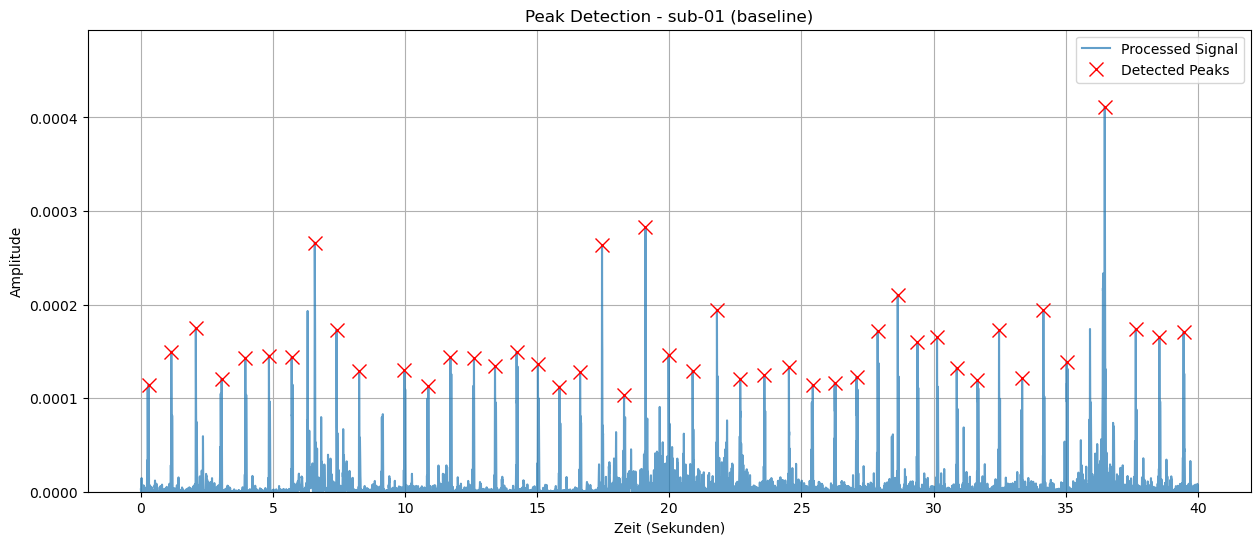


Speichere aktualisierte Baseline-Daten mit BPM-Werten...
Baseline-Daten erfolgreich gespeichert unter: /Users/luca/Downloads/GitHub/Team_U-bahn/preprocessed-data/baseline_preprocessed.pkl


In [7]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd

# Filterparameter
fs = 1000  # Samplingrate (Hz)
lowcut = 0.5  # Untere Grenzfrequenz (Hz)
highcut = 30.0  # Obere Grenzfrequenz (Hz)

# Butterworth-Bandpass-Filter erstellen
b, a = signal.butter(1, [lowcut / (0.5 * fs), highcut / (0.5 * fs)], btype='band')

# Ordner zum Speichern der Daten
derivative_folder = '/Users/luca/Downloads/GitHub/Team_U-bahn/preprocessed-data/'
output_filename = os.path.join(derivative_folder, 'baseline_preprocessed.pkl')

# Sicherstellen, dass der Ausgabeordner existiert
os.makedirs(derivative_folder, exist_ok=True)

# Liste für die verarbeiteten Daten
processed_baseline_data = []

# Dateien im Ordner durchsuchen
raw_data_folder = '/Users/luca/Downloads/GitHub/Team_U-bahn/rawdata/'
files = [f for f in os.listdir(raw_data_folder) if f.endswith('.csv') and 'baseline_ecg' in f]

for filename in files:
    file_path = os.path.join(raw_data_folder, filename)

    # Datei laden
    data = pd.read_csv(file_path)

    # Teilnehmer- und Bedingungsinformationen aus dem Dateinamen ableiten
    participant_name = filename.split('_')[0]
    condition_name = 'baseline'

    # Extrahiere Daten
    ecg_data = data['ECG (mV)'].to_numpy()
    time_data = data['Time'].to_numpy()

    # Filter anwenden
    filtered_ecg = signal.filtfilt(b, a, ecg_data)

    # Ableitungsfilter und Quadratbildung anwenden
    derivative_ecg = np.diff(filtered_ecg)
    squared_ecg = np.square(derivative_ecg)

    # Speichere die verarbeiteten Daten in einer neuen Struktur
    processed_baseline_data.append({
        "participant": participant_name,
        "condition": condition_name,
        "filtered_data": filtered_ecg,
        "derive_sq_data": squared_ecg,
        "time": time_data
    })

    # Visualisierung: Original und Gefiltertes Signal in einem Plot
    plt.figure(figsize=(15, 3))  # Flacherer Plot durch kleinere Höhe
    plt.plot(
        time_data[:-1],
        ecg_data[:-1],
        label="Unfiltered ECG",
        color="blue",
        alpha=0.5,
        linewidth=1,
    )
    plt.plot(
        time_data[:-1],
        filtered_ecg[:-1],
        label="Filtered ECG",
        color="red",
        alpha=0.8,
        linewidth=1.5,
    )
    plt.title(f"ECG Signal - {participant_name} ({condition_name})", fontsize=14, fontweight='bold')
    plt.xlabel("Time (s)", fontsize=12)
    plt.ylabel("Amplitude (mV)", fontsize=12)
    plt.legend()
    plt.grid(alpha=0.5, linestyle="--")
    plt.show()

    # Visualisierung der DiffSquared Data
    plt.figure(figsize=(15, 3))
    plt.plot(
        time_data[:-1],
        squared_ecg,
        label="DiffSquared Data",
        color="green",
        alpha=0.7,
    )
    plt.title(f"DiffSquared Signal - {participant_name} ({condition_name})", fontsize=14, fontweight='bold')
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (Squared)", fontsize=12)
    plt.legend()
    plt.grid(alpha=0.5, linestyle="--")
    plt.show()

# Speichern der verarbeiteten Daten in einer Pickle-Datei
with open(output_filename, 'wb') as f:
    pickle.dump(processed_baseline_data, f)

print(f'Baseline-Daten erfolgreich gespeichert unter: {output_filename}')

# --- Verarbeitung der geladenen Baseline-Daten ---
print("Lade vorverarbeitete Baseline-Daten...")
with open(output_filename, 'rb') as f:
    loaded_baseline_data = pickle.load(f)

print("\nStruktur des ersten Baseline-Datenobjekts:")
print(loaded_baseline_data[0].keys())

# Verarbeitung der geladenen Baseline-Daten
for participant_data in loaded_baseline_data:
    condition_name = participant_data["condition"]
    participant_name = participant_data["participant"]
    derive_sq_data = participant_data["derive_sq_data"].flatten()

    # Adaptive Schwellenwertberechnung
    signal_mean = np.mean(derive_sq_data)
    signal_std = np.std(derive_sq_data)
    indiv_threshold = signal_mean + 3 * signal_std

    # Mindestabstand zwischen Peaks
    sampling_frequency = 1000  # Hz
    min_ecg_interval = 0.6    # Sekunden (entspricht 100 BPM)
    indiv_distance = int(min_ecg_interval * sampling_frequency)

    # Peaks finden
    peaks, _ = signal.find_peaks(derive_sq_data, 
                                 height=indiv_threshold,
                                 distance=indiv_distance)

    # BPM berechnen
    peak_times = peaks / sampling_frequency
    num_minutes = (derive_sq_data.shape[0] / sampling_frequency) / 60
    bpm = len(peaks) / num_minutes

    print(f"\nTeilnehmer: {participant_name}, Bedingung: {condition_name}")
    print(f"Anzahl erkannter Peaks: {len(peaks)}")
    print(f"Aufnahmedauer: {num_minutes:.2f} Minuten")
    print(f"Durchschnittliche BPM: {bpm:.2f}")

    # Plot der ersten 40 Sekunden
    first_segment_samples = sampling_frequency * 40
    time_axis = np.arange(first_segment_samples) / sampling_frequency

    plt.figure(figsize=(15, 6))
    plt.plot(time_axis, derive_sq_data[:first_segment_samples], label="Processed Signal", alpha=0.7)
    first_segment_peaks = peaks[peaks < first_segment_samples]
    plt.plot(first_segment_peaks / sampling_frequency, derive_sq_data[first_segment_peaks], "rx", label="Detected Peaks", markersize=10)
    plt.title(f"Peak Detection - {participant_name} ({condition_name})")
    plt.xlabel("Zeit (Sekunden)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.ylim(0, np.max(derive_sq_data[:first_segment_samples]) * 1.2)
    plt.show()

    # BPM im Datensatz speichern
    participant_data["bpm"] = bpm

# Speichern der aktualisierten Daten mit BPM-Werten
print("\nSpeichere aktualisierte Baseline-Daten mit BPM-Werten...")
with open(output_filename, 'wb') as f:
    pickle.dump(loaded_baseline_data, f)

print(f"Baseline-Daten erfolgreich gespeichert unter: {output_filename}")


# *Neurokit2*

In [22]:
import neurokit2 as nk
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import numpy as np
import os

from neurokit2.signal.signal_rate import _signal_rate_plot
from neurokit2.ecg.ecg_peaks import _ecg_peaks_plot
from neurokit2.ecg.ecg_segment import ecg_segment

# Pfade zu den Ordnern
raw_data_folder = '/Users/luca/Downloads/GitHub/Team_U-bahn/rawdata/'
results_folder = '/Users/luca/Downloads/GitHub/Team_U-bahn/results/ECG'
os.makedirs(results_folder, exist_ok=True)

# Parameter
participants = ['sub-01', 'sub-02']
conditions1 = ['empty', 'full']
conditions2 = ['bright', 'dark']

all_results = []

# Verarbeitung für jeden Teilnehmer und jede Bedingung
for pi in participants:
    for c1 in conditions1:
        for c2 in conditions2:
            # Erstelle den Dateipfad
            filename = f"{raw_data_folder}/{pi}_{c1}-{c2}_ecg.csv"
            print(f'\nProcessing: {filename}')
            
            try:
                # EKG-Daten lesen
                subdata = pd.read_csv(filename, header=None, names=['ECG'], skiprows=1)
                ecg_data = subdata['ECG'].values
                
                print(f"Data length: {len(ecg_data)} samples")
                
                # Vollständige Verarbeitung des Signals
                signals_full, info = nk.ecg_process(ecg_data, sampling_rate=1000)
                
                # Erstelle GridSpec für die Visualisierung
                gs = matplotlib.gridspec.GridSpec(2, 2, width_ratios=[2/3, 1/3])
                fig = plt.figure(figsize=(15, 10))
                
                # Subplots erstellen
                ax0 = fig.add_subplot(gs[0, :-1])
                ax1 = fig.add_subplot(gs[1, :-1], sharex=ax0)
                ax2 = fig.add_subplot(gs[:, -1])
                
                # EKG-Peaks plotten
                phase = None
                if "ECG_Phase_Ventricular" in signals_full.columns:
                    phase = signals_full["ECG_Phase_Ventricular"].values
                
                ax0 = _ecg_peaks_plot(
                    signals_full["ECG_Clean"].values,
                    info=info,
                    sampling_rate=info["sampling_rate"],
                    raw=signals_full["ECG_Raw"].values,
                    quality=signals_full["ECG_Quality"].values,
                    phase=phase,
                    ax=ax0
                )
                
                # Herzfrequenz plotten
                ax1 = _signal_rate_plot(
                    signals_full["ECG_Rate"].values,
                    info["ECG_R_Peaks"],
                    sampling_rate=info["sampling_rate"],
                    title="Heart Rate",
                    ytitle="Beats per minute (bpm)",
                    color="#FF5722",
                    color_mean="#FF9800",
                    color_points="#FFC107",
                    ax=ax1
                )
                
                # Einzelne Herzzyklen plotten
                ax2 = ecg_segment(
                    signals_full,
                    info["ECG_R_Peaks"],
                    info["sampling_rate"],
                    show="return",
                    ax=ax2
                )
                
                # Subplot-Positionen anpassen
                ax0.set_position([0.1, 0.6, 0.6, 0.35])
                ax1.set_position([0.1, 0.1, 0.6, 0.35])
                ax2.set_position([0.75, 0.1, 0.2, 0.85])
                
                # Titel für die gesamte Abbildung setzen
                plt.suptitle(f"ECG Analysis - {pi} ({c1}_{c2})", y=0.95)
                
                # Abbildung speichern
                figure_filename = f"{results_folder}/{pi}_{c1}_{c2}_ecg_nk.png"
                plt.savefig(figure_filename, bbox_inches='tight', dpi=300)
                print(f"Saved figure to {figure_filename}")
                plt.close()
                
                # Intervalbezogene Features berechnen
                print("\nCalculating interval-related features...")
                results = nk.ecg_intervalrelated(signals_full, sampling_rate=1000)
                
                # Metadaten hinzufügen
                results['Participant'] = pi
                results['Condition'] = f"{c1}_{c2}"
                all_results.append(results)
                
                print("Interval-related features:")
                print(results)
                
                # Signal reinigen
                ecg_cleaned = nk.ecg_clean(ecg_data, sampling_rate=1000)
                
                # R-Peaks finden
                peaks, info = nk.ecg_peaks(ecg_cleaned, sampling_rate=1000, correct_artifacts=True)
                
                # HRV-Indices berechnen
                print("\nCalculating HRV indices...")
                hrv_indices = nk.hrv(peaks, sampling_rate=1000, show=True)
                
                # Metadaten hinzufügen
                hrv_indices['Participant'] = pi
                hrv_indices['Condition'] = f"{c1}_{c2}"
                all_results.append(hrv_indices)
                
                # Plot speichern
                figure_filename = f"{results_folder}/{pi}_{c1}_{c2}_hrv_plot.png"
                plt.savefig(figure_filename, dpi=300, bbox_inches='tight')
                print(f"Saved HRV plot to {figure_filename}")
                plt.close()
                
                print("HRV indices:")
                print(hrv_indices)
                
            except FileNotFoundError:
                print(f'File not found: {filename}')
                continue
            except Exception as e:
                print(f'Error processing {filename}: {str(e)}')
                continue

# Alle Ergebnisse kombinieren
print("\nCombining all results...")
final_results = pd.concat(all_results, ignore_index=True)

# Ergebnisse speichern
output_filename = f"{results_folder}/ecg_results.csv"
final_results.to_csv(output_filename, index=False)
print(f"\nSaved results to {output_filename}")



Processing: /Users/luca/Downloads/GitHub/Team_U-bahn/rawdata//sub-01_empty-bright_ecg.csv
Data length: 299000 samples
Saved figure to /Users/luca/Downloads/GitHub/Team_U-bahn/results/ECG/sub-01_empty_bright_ecg_nk.png

Calculating interval-related features...
Interval-related features:
  ECG_Rate_Mean            HRV_MeanNN               HRV_SDNN  \
0     74.944525  [[800.752688172043]]  [[42.55319319997456]]   

               HRV_SDANN1              HRV_SDNNI1 HRV_SDANN2 HRV_SDNNI2  \
0  [[20.055846752589904]]  [[37.535836440648225]]    [[nan]]    [[nan]]   

  HRV_SDANN5 HRV_SDNNI5               HRV_RMSSD  ...             HRV_FuzzyEn  \
0    [[nan]]    [[nan]]  [[33.027228822076005]]  ...  [[1.1450104474274903]]   

                 HRV_MSEn               HRV_CMSEn              HRV_RCMSEn  \
0  [[1.4891332825170625]]  [[1.3099847330133265]]  [[2.0280491931992692]]   

                   HRV_CD                 HRV_HFD                HRV_KFD  \
0  [[1.7579618023517334]]  [[1.715498589

### Baseline

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import neurokit2 as nk

from neurokit2.signal.signal_rate import _signal_rate_plot
from neurokit2.ecg.ecg_peaks import _ecg_peaks_plot
from neurokit2.ecg.ecg_segment import ecg_segment

# Pfade zu den Ordnern
raw_data_folder = '/Users/luca/Downloads/GitHub/Team_U-bahn/rawdata/'
results_folder = '/Users/luca/Downloads/GitHub/Team_U-bahn/results/ECG/Baseline'
os.makedirs(results_folder, exist_ok=True)

# Parameter
baseline_files = [
    "sub-01_baseline_ecg.csv",
    "sub-02_baseline_ecg.csv"
]

all_results = []

# Verarbeitung für jede Baseline-Datei
for filename in baseline_files:
    # Erstelle den Dateipfad
    file_path = os.path.join(raw_data_folder, filename)
    participant = filename.split('_')[0]
    condition = "baseline"

    print(f'\nProcessing: {file_path}')

    try:
        # EKG-Daten lesen
        subdata = pd.read_csv(file_path, header=None, names=['ECG'], skiprows=1)
        ecg_data = subdata['ECG'].values

        print(f"Data length: {len(ecg_data)} samples")

        # Vollständige Verarbeitung des Signals
        signals_full, info = nk.ecg_process(ecg_data, sampling_rate=1000)

        # Erstelle GridSpec für die Visualisierung
        gs = matplotlib.gridspec.GridSpec(2, 2, width_ratios=[2/3, 1/3])
        fig = plt.figure(figsize=(15, 10))

        # Subplots erstellen
        ax0 = fig.add_subplot(gs[0, :-1])
        ax1 = fig.add_subplot(gs[1, :-1], sharex=ax0)
        ax2 = fig.add_subplot(gs[:, -1])

        # EKG-Peaks plotten
        phase = None
        if "ECG_Phase_Ventricular" in signals_full.columns:
            phase = signals_full["ECG_Phase_Ventricular"].values

        ax0 = _ecg_peaks_plot(
            signals_full["ECG_Clean"].values,
            info=info,
            sampling_rate=info["sampling_rate"],
            raw=signals_full["ECG_Raw"].values,
            quality=signals_full["ECG_Quality"].values,
            phase=phase,
            ax=ax0
        )

        # Herzfrequenz plotten
        ax1 = _signal_rate_plot(
            signals_full["ECG_Rate"].values,
            info["ECG_R_Peaks"],
            sampling_rate=info["sampling_rate"],
            title="Heart Rate",
            ytitle="Beats per minute (bpm)",
            color="#FF5722",
            color_mean="#FF9800",
            color_points="#FFC107",
            ax=ax1
        )

        # Einzelne Herzzyklen plotten
        ax2 = ecg_segment(
            signals_full,
            info["ECG_R_Peaks"],
            info["sampling_rate"],
            show="return",
            ax=ax2
        )

        # Subplot-Positionen anpassen
        ax0.set_position([0.1, 0.6, 0.6, 0.35])
        ax1.set_position([0.1, 0.1, 0.6, 0.35])
        ax2.set_position([0.75, 0.1, 0.2, 0.85])

        # Titel für die gesamte Abbildung setzen
        plt.suptitle(f"Baseline ECG Analysis - {participant}", y=0.95)

        # Abbildung speichern
        figure_filename = f"{results_folder}/{participant}_{condition}_ecg_nk.png"
        plt.savefig(figure_filename, bbox_inches='tight', dpi=300)
        print(f"Saved figure to {figure_filename}")
        plt.close()

        # Intervalbezogene Features berechnen
        print("\nCalculating interval-related features...")
        results = nk.ecg_intervalrelated(signals_full, sampling_rate=1000)

        # Metadaten hinzufügen
        results['Participant'] = participant
        results['Condition'] = condition
        all_results.append(results)

        print("Interval-related features:")
        print(results)

        # Signal reinigen
        ecg_cleaned = nk.ecg_clean(ecg_data, sampling_rate=1000)

        # R-Peaks finden
        peaks, info = nk.ecg_peaks(ecg_cleaned, sampling_rate=1000, correct_artifacts=True)

        # HRV-Indices berechnen
        print("\nCalculating HRV indices...")
        hrv_indices = nk.hrv(peaks, sampling_rate=1000, show=True)

        # Metadaten hinzufügen
        hrv_indices['Participant'] = participant
        hrv_indices['Condition'] = condition
        all_results.append(hrv_indices)

        # Plot speichern
        figure_filename = f"{results_folder}/{participant}_{condition}_hrv_plot.png"
        plt.savefig(figure_filename, dpi=300, bbox_inches='tight')
        print(f"Saved HRV plot to {figure_filename}")
        plt.close()

        print("HRV indices:")
        print(hrv_indices)

    except FileNotFoundError:
        print(f'File not found: {file_path}')
        continue
    except Exception as e:
        print(f'Error processing {file_path}: {str(e)}')
        continue

# Alle Ergebnisse kombinieren
print("\nCombining all results...")
final_results = pd.concat(all_results, ignore_index=True)

# Ergebnisse speichern
output_filename = f"{results_folder}/baseline_ecg_results.csv"
final_results.to_csv(output_filename, index=False)
print(f"\nSaved baseline results to {output_filename}")



Processing: /Users/luca/Downloads/GitHub/Team_U-bahn/rawdata/sub-01_baseline_ecg.csv
Data length: 323100 samples
Saved figure to /Users/luca/Downloads/GitHub/Team_U-bahn/results/ECG/Baseline/sub-01_baseline_ecg_nk.png

Calculating interval-related features...
Interval-related features:
  ECG_Rate_Mean             HRV_MeanNN               HRV_SDNN  \
0     71.104725  [[844.3228346456693]]  [[87.11908503426099]]   

               HRV_SDANN1             HRV_SDNNI1              HRV_SDANN2  \
0  [[29.204021472197816]]  [[71.55188880254767]]  [[25.681829822859033]]   

             HRV_SDNNI2 HRV_SDANN5 HRV_SDNNI5              HRV_RMSSD  ...  \
0  [[83.0949483064688]]    [[nan]]    [[nan]]  [[60.47182902197649]]  ...   

              HRV_FuzzyEn                HRV_MSEn              HRV_CMSEn  \
0  [[0.7440579926313724]]  [[1.0953407571016924]]  [[1.365079785847284]]   

               HRV_RCMSEn                  HRV_CD                 HRV_HFD  \
0  [[1.6104105633173116]]  [[0.976878283332